## Housing Case Study
Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —

To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

To know the accuracy of the model, i.e. how well these variables can predict house prices.

In [18]:
#1 Import the dataset (Housing.csv) and look at the top five rows
import pandas as pd
df = pd.read_csv('Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [19]:
#2 Check the shape of the DataFrame (rows, columns)
df.shape

(545, 13)

In [20]:
#3 Look at the data types of the columns
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [21]:
#4 Check for missing  values if any, replace with appropriate values
print(df.isnull().sum())
#df.fillna(df.mean(), inplace=True) to replace with mean


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [29]:
#5 Prepare  X (independent variables) and y (dependent variable)
y = df['price']
X = df.drop(columns=['price'])#except x all are independent
#X= df.iloc[:,0]
#y = df.iloc[:,1:]
print(X.head()) 
print(y.head())

       area  bedrooms  bathrooms   stories  mainroad  guestroom  basement  \
0  1.046726  1.403419   1.421812  1.378217  0.405623  -0.465315 -0.734539   
1  1.757010  1.403419   5.405809  2.532024  0.405623  -0.465315 -0.734539   
2  2.218232  0.047278   1.421812  0.224410  0.405623  -0.465315  1.361397   
3  1.083624  1.403419   1.421812  0.224410  0.405623  -0.465315  1.361397   
4  1.046726  1.403419  -0.570187  0.224410  0.405623   2.149083  1.361397   

   hotwaterheating  airconditioning   parking  prefarea  furnishingstatus  
0        -0.219265         1.472618  1.517692  1.804941         -1.406286  
1        -0.219265         1.472618  2.679409 -0.554035         -1.406286  
2        -0.219265        -0.679063  1.517692  1.804941         -0.091662  
3        -0.219265         1.472618  2.679409  1.804941         -1.406286  
4        -0.219265         1.472618  1.517692 -0.554035         -1.406286  
0    4.566365
1    4.004484
2    4.004484
3    3.985755
4    3.554979
Name: price

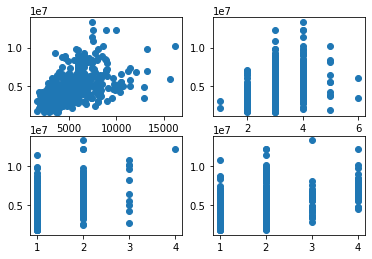

In [23]:
#6 Visualise the relationship between the independent variables and the depenedent variable using scatterplots

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your dataset DataFrame
# df = pd.read_csv('your_dataset.csv')  # load your dataset if it's in a CSV file

# Visualizing the relationship between independent variables and the dependent variable (price)
plt.subplot(2,2,1)
plt.scatter(df.iloc[:,1],df.iloc[:,0])
plt.subplot(2,2,2)
plt.scatter(df.iloc[:,2],df.iloc[:,0])
plt.subplot(2,2,3)
plt.scatter(df.iloc[:,3],df.iloc[:,0])

plt.subplot(2,2,4)
plt.scatter(df.iloc[:,4],df.iloc[:,0])

plt.show()

In [24]:
#7 Encoding categorical data in X


# X_encoded = pd.get_dummies(X, drop_first=True)
# print(X_encoded.head())     one hot encoding
from sklearn.preprocessing import LabelEncoder

# label_encoder = LabelEncoder()

# df['furnishingstatus'] = label_encoder.fit_transform(df['furnishingstatus'])
# df['mainroad'] = label_encoder.fit_transform(df['mainroad'])
# df['guestroom'] = label_encoder.fit_transform(df['guestroom'])
# df['basement'] = label_encoder.fit_transform(df['basement'])
# df['hotwaterheating'] = label_encoder.fit_transform(df['hotwaterheating'])
# df['airconditioning'] = label_encoder.fit_transform(df['airconditioning'])
# df['prefarea'] = label_encoder.fit_transform(df['prefarea'])


# print(df['furnishingstatus'])
# print(df['mainroad'])

le = LabelEncoder()
data = df.select_dtypes(include = ['object']).columns
for col in data:
    df[col] = le.fit_transform(df[col])
print(df)



        price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    13300000  7420         4          2        3         1          0   
1    12250000  8960         4          4        4         1          0   
2    12250000  9960         3          2        2         1          0   
3    12215000  7500         4          2        2         1          0   
4    11410000  7420         4          1        2         1          1   
..        ...   ...       ...        ...      ...       ...        ...   
540   1820000  3000         2          1        1         1          0   
541   1767150  2400         3          1        1         0          0   
542   1750000  3620         2          1        1         1          0   
543   1750000  2910         3          1        1         0          0   
544   1750000  3850         3          1        2         1          0   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
0           0                0           

In [25]:
#8  Avoiding the Dummy Variable Trap
df_encoded = pd.get_dummies(df, columns=['mainroad','guestroom','basement','hotwaterheating','prefarea','airconditioning'])
print(df_encoded.head())

      price  area  bedrooms  bathrooms  stories  parking  furnishingstatus  \
0  13300000  7420         4          2        3        2                 0   
1  12250000  8960         4          4        4        3                 0   
2  12250000  9960         3          2        2        2                 1   
3  12215000  7500         4          2        2        3                 0   
4  11410000  7420         4          1        2        2                 0   

   mainroad_0  mainroad_1  guestroom_0  guestroom_1  basement_0  basement_1  \
0       False        True         True        False        True       False   
1       False        True         True        False        True       False   
2       False        True         True        False       False        True   
3       False        True         True        False       False        True   
4       False        True        False         True       False        True   

   hotwaterheating_0  hotwaterheating_1  prefarea_0  pre

In [26]:
#9 Apply feature scaling on numerical variables
from sklearn.preprocessing import StandardScaler  #or we can do normalization scaler(MinMaxScaler)

# Assuming df is your dataset
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns  # Get numerical columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply scaling to numerical columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

print(df.head())

      price      area  bedrooms  bathrooms   stories  mainroad  guestroom  \
0  4.566365  1.046726  1.403419   1.421812  1.378217  0.405623  -0.465315   
1  4.004484  1.757010  1.403419   5.405809  2.532024  0.405623  -0.465315   
2  4.004484  2.218232  0.047278   1.421812  0.224410  0.405623  -0.465315   
3  3.985755  1.083624  1.403419   1.421812  0.224410  0.405623  -0.465315   
4  3.554979  1.046726  1.403419  -0.570187  0.224410  0.405623   2.149083   

   basement  hotwaterheating  airconditioning   parking  prefarea  \
0 -0.734539        -0.219265         1.472618  1.517692  1.804941   
1 -0.734539        -0.219265         1.472618  2.679409 -0.554035   
2  1.361397        -0.219265        -0.679063  1.517692  1.804941   
3  1.361397        -0.219265         1.472618  2.679409  1.804941   
4  1.361397        -0.219265         1.472618  1.517692 -0.554035   

   furnishingstatus  
0         -1.406286  
1         -1.406286  
2         -0.091662  
3         -1.406286  
4         -1

In [30]:
#10 Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_test
from sklearn.model_selection import train_test_split

# Assuming X (independent variables) and y (dependent variable) are already defined
# X = df.drop(columns=['price'])  # Example if you haven't defined X and y yet
# y = df['price']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shape of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (381, 12)
X_test shape: (164, 12)
y_train shape: (381,)
y_test shape: (164,)


In [31]:
#11 Fitting Multiple Linear Regression to the Training
from sklearn.linear_model import LinearRegression

# Initialize the model
regressor = LinearRegression()

# Fit the model to the training data
regressor.fit(X_train, y_train)

# Print the coefficients (weights) and intercept
print("Coefficients:", regressor.coef_)
print("Intercept:", regressor.intercept_)

# Predict on the training data (optional, if you want to see predictions)
y_train_pred = regressor.predict(X_train)

# Check the first few predicted values
print("Predictions on training set:", y_train_pred[:5])

Coefficients: [ 0.29361062  0.03264667  0.30016789  0.19284469  0.0761076   0.05721609
  0.12382289  0.06940264  0.16911829  0.14006844  0.11556489 -0.08060973]
Intercept: 0.01402078885066511
Predictions on training set: [ 0.30265032 -0.6457506  -0.19391226  0.88621998  0.84772632]


In [32]:
#12 Predict on the train set and calculate the error = y_pred - y_train
# Predict on the train set
y_pred = regressor.predict(X_train)

# Calculate the error (difference between predicted and actual values)
error = y_pred - y_train

# Print the first few errors
print("Errors (y_pred - y_train) for the first 5 samples:", error[:5])

# Optionally, you can check the mean error
mean_error = error.mean()
print("Mean error:", mean_error)

Errors (y_pred - y_train) for the first 5 samples: 126   -0.293089
363   -0.080269
370    0.409029
31    -1.058033
113    0.143357
Name: price, dtype: float64
Mean error: 1.8649415636748036e-17


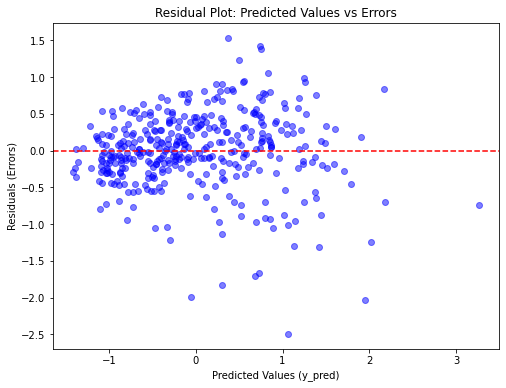

In [38]:
#13  Residual plot - plot y_pred in x axis and errors in y axis
import matplotlib.pyplot as plt

# Plot residuals (errors) StandardScalervs predicted values (y_pred)
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, error, color='blue', alpha=0.5)

# Adding labels and title
plt.title('Residual Plot: Predicted Values vs Errors')
plt.xlabel('Predicted Values (y_pred)')
plt.ylabel('Residuals (Errors)')

# Show the plot
plt.axhline( color='r', linestyle='--')  # Adding a horizontal line at 0 for reference
plt.show()

In [39]:
#14  Predic on the test set

# Predict on the test set
y_test_pred = regressor.predict(X_test)

# Print the first few predictions
print("Predictions on the test set:", y_test_pred[:5])


Predictions on the test set: [ 0.34289709  1.24708501 -0.91574137 -0.15507064 -0.77633   ]


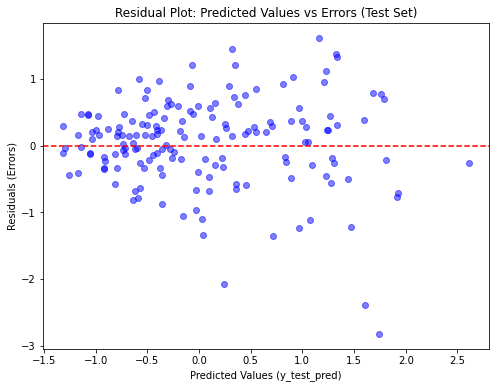

In [44]:
#15 Residual plot - plot y_pred in x axis and errors in y axis
import matplotlib.pyplot as plt

# Calculate the errors (residuals) on the test set
test_error = y_test_pred - y_test

# Plot residuals (errors) vs predicted values (y_test_pred)
plt.figure(figsize=(8, 6))
plt.scatter(y_test_pred, test_error, color='blue', alpha=0.5)

# Adding labels and title
plt.title('Residual Plot: Predicted Values vs Errors (Test Set)')
plt.xlabel('Predicted Values (y_test_pred)')
plt.ylabel('Residuals (Errors)')

# Show the plot
plt.axhline(y=0, color='r', linestyle='--')  # Adding a horizontal line at 0 for reference
plt.show()

In [42]:
#16 Print Mean Squared Error and R Squared Value
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_test_pred)

# Calculate R-squared (R²) value
r2 = r2_score(y_test, y_test_pred)

# Print the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²) value: {r2}")

Mean Squared Error (MSE): 0.43957411454200224
R-squared (R²) value: 0.6435419628959107


In [45]:
#17 Check  Adjusted R Squared Value(by selecting different no of input variables insted of all)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Function to calculate adjusted R-squared
def adjusted_r2(X, y):
    model = LinearRegression().fit(X, y)
    r2 = model.score(X, y)
    n, p = X.shape
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Feature subsets
adj_r2_X1 = adjusted_r2(X[['area', 'bedrooms']], y)
adj_r2_X2 = adjusted_r2(X[['area', 'bedrooms', 'bathrooms']], y)
adj_r2_X3 = adjusted_r2(X[['area', 'bedrooms', 'bathrooms', 'stories']], y)

# Output results
print(f"Adjusted R² - X1: {adj_r2_X1}")
print(f"Adjusted R² - X2: {adj_r2_X2}")
print(f"Adjusted R² - X3: {adj_r2_X3}")

Adjusted R² - X1: 0.3681699478636079
Adjusted R² - X2: 0.48423879535674064
Adjusted R² - X3: 0.5321560149819948


In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
X1 = X[['area', 'bedrooms']]
y_true = y

# Model and adjusted R² calculations
model = LinearRegression()

model.fit(X1, y_true)
r2 = model.score(X1, y_true)
n, p = X1.shape
adj_r2_X1 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"Adjusted R² - X1: {adj_r2_X1}")

Adjusted R² - X1: 0.3681699478636079
